In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OscFit path
sys.path.append('/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules')

In [3]:
import dataLoader, oscFit
reload(dataLoader)
import MCEqFlux

In [4]:
user = 'kpi_user_v1'
pid_array = np.array([-3, 2., np.inf])
sky_start = -1
sky_stop = 1
bins = 9

In [5]:
loader =  dataLoader.dataLoader(bin_edges   = [10**np.linspace(0.75,2.15,11),
                                               np.arccos(np.linspace(sky_start,sky_stop,bins))[::-1],
                                               pid_array],
                                    observables = ['reco_energy', 'reco_zenith', 'delta_llh'],
                                    user = user,
                                    LEaxis = [],
                                    bkg_diff_is_syst = True,
                                    #user_init = [0],
                                    expected_years = 3,
                                    weight_keys = ['weight_e', 'weight_mu'],
                                    detsys_perflavor=False, # Calculate the detector variations per flavor
                                    legacy_detsys = False, # Calcualte the detector variations as in the PRD paper
                                    detailed_detsys=False, # Re-calculate the detector variations at each minimization step
                                    verbose = False)


 ************************************ 
 **** oscFit3D v1.0 - dataLoader ****
 ************************************
dataLoader: Initializing user kpi_user_v1


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/dataLoader.py:45: RuntimeWarning: divide by zero encountered in divide
  in_dict['LE'] = np.log10(propagationDistance(in_dict['reco_zenith'])/in_dict['reco_energy'])


dataLoader: MC loaded successfully!
dataLoader: Setting MCEq fluxes for all mc sets, including systematic variations
List of files used for atmmu_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_4.11082016.pckl
List of files used for atmmu_new_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_4.11082016.pckl
dataLoader: Muon background templates loaded successfully!
dataLoader: Loading systematic variations using default values.


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yvalues_bin = np.array(y_values[[[x]for x in one_index]][0])
/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  werrors     = np.sqrt(np.array(y_valuesw2[[[x]for x in one_index]][0]))/yvalues_bin


In [6]:
print 'DONE'

DONE


In [7]:
livetime = loader.sec2years*2.8

In [8]:
import oscFit
reload(oscFit)

<module 'oscFit' from '/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/oscFit.pyc'>

In [20]:
ref = loader.loadMCasData({'norm_nu':2.9,
                          'norm_atmmu':0})
print 'Events in pseudo-data sample', np.sum(ref)

dataLoader: atmmu_norm  0 , noise_norm 1.0
Events in pseudo-data sample 42336.68790338542


In [10]:
fitter = oscFit.fitOscParams()
data_loaders    = [loader]          # Here you could list many samples to be fit at once
data_histograms = [ref]  # The data histogram for each of the samples


 ************************************ 
 ****** oscFit3D v1.0 - oscFit ******
 ************************************


In [11]:
# The settings of the fit are given as [ini_value, fix?]
fit_settings    = {
    'simulation':     'baseline',      # This patches GENIE simulation with NuGen.
    'dm31':           [0.0025, False, 'NH'], # Need to specify the hierarchy of the fit
    'theta23':        [0.78, False],         # Not used in the "TwoNeutrino" mode
    'theta13':        [0.148, True],        # Not used in the "TwoNeutrino" mode
    'mix_angle':      [0.95, False, 1.4],     # Only used in the "TwoNeutrino" mode. Leave as is otherwise.
    'oscMode':        'TwoNeutrino',         # How do you want to fit the data?
    'oscTables':      False,
    'norm':           [1.0, False],
    'norm_e':         [1., True],
    'norm_tau':       [1., True],            # Set to false for nutau apperance studies
    'nu_nubar':       [1., True],
    'nubar_ratio':     [0., True],
    'uphor_ratio':    [0., True],

    'gamma':          [0.00, False],
    # New parameters
    'w_pi':           [0.00, True],
    'w_k':            [0.02, False],
    
    
    'axm_qe':         [0., True],
    'axm_res':        [0., False],
    'pid_bias':       [0., True],
    'hole_ice':       [0.02, False],
    'hi_fwd':         [0.0, False],

    'norm_nc':        [1., False],
    'domeff':         [1., False],
    'had_escale':     [1., True],
    'atmmu_f':        [0.06, False, 'new_data'],
    'noise_f':        [0.0, True],
#    'fix_norm_region':[1.7],
    'detector_syst':  True,
    'include_priors': True,
    'printMode':      -1}                  # Do you want to see every step MINUIT takes?

In [12]:
result_NH = fitter(data_histograms=data_histograms,
                data_loaders=data_loaders,
                fit_settings=fit_settings,
                #fit_priors = fit_priors,
                ncalls = 1000,
                do_chi2_fit = True,
                store_fit_details = True)

oscFit: Fitter running in TwoNeutrino mode
oscFit: 42509.02790338542  events in data
oscFit: Fitting in normal hierarchy mode
304.81571
oscFit: Testing the LLH2 function  304.81570885776927
Baseline LLH value given in settings:  0.0
oscFit: Fit settings
	noise_f 	[0.0, True]
	pid_bias 	[0.0, True]
	deltacp 	[0.0, True]
	hi_fwd 	[0.0, False]
	printMode 	-1
	oscMode 	TwoNeutrino
	include_priors 	True
	theta24 	[0.0, True]
	atmmu_f 	[0.06, False, 'new_data']
	w_k 	[0.02, False]
	theta23 	[0.78, False]
	uphor_ratio 	[0.0, True]
	detector_syst 	True
	theta34 	[0.0, True]
	w_pi 	[0.0, True]
	norm 	[1.0, False]
	axm_res 	[0.0, False]
	norm_tau 	[1.0, True]
	oscTables 	False
	nubar_ratio 	[0.0, True]
	dm41 	[0.0, True]
	norm_nc 	[1.0, False]
	domeff 	[1.0, False]
	hole_ice 	[0.02, False]
	dm31 	[0.0025, False, 'NH']
	nu_nubar 	[1.0, True]
	baseline_llh 	[0.0, True]
	had_escale 	[1.0, True]
	dm21 	[7.53e-05, True]
	mix_angle 	[0.95, False, 1.4]
	simulation 	baseline
	norm_e 	[1.0, True]
	axm_qe

72.91094  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02724  +0.42486  +1.05678  +0.98245  +0.01461  +0.89376
72.96087  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42627  +1.05678  +0.98245  +0.01461  +0.89376
72.90610  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42346  +1.05678  +0.98245  +0.01461  +0.89376
72.91186  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42486  +1.05715  +0.98245  +0.01461  +0.89376
72.95510  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42486  +1.05641  +0.98245  +0.01461  +0.89376
72.90442  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42486  +1.05678  +0.98253  +0.01461  +0.89376
72.96255  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42486  +1.05678  +0.98237  +0.01461  +0.89376
72.91479  +0.00253  +0.87090  +1.00002  -0.00834  -0.07172  +0.02726  +0.42486  +1.05678  +0.98245  +0.01461  +0.89376
72.95216  +0.00253  +0.87090  +1.00002  -0.00834

21.49022  +0.00243  +0.97145  +0.99977  -0.00073  +0.05943  +0.00770  +0.14606  +1.07630  +1.00336  +0.01749  +0.86218
21.49000  +0.00243  +0.97145  +0.99977  -0.00073  +0.05897  +0.00770  +0.14606  +1.07630  +1.00336  +0.01749  +0.86218
21.49223  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00771  +0.14606  +1.07630  +1.00336  +0.01749  +0.86218
21.48798  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00770  +0.14606  +1.07630  +1.00336  +0.01749  +0.86218
21.48836  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00770  +0.14675  +1.07630  +1.00336  +0.01749  +0.86218
21.49186  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00770  +0.14538  +1.07630  +1.00336  +0.01749  +0.86218
21.48952  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00770  +0.14606  +1.07651  +1.00336  +0.01749  +0.86218
21.49069  +0.00243  +0.97145  +0.99977  -0.00073  +0.05920  +0.00770  +0.14606  +1.07608  +1.00336  +0.01749  +0.86218
21.48778  +0.00243  +0.97145  +0.99977  -0.00073

17.27679  +0.00248  +0.97650  +0.99964  -0.00647  +0.20388  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27671  +0.00248  +0.97650  +0.99965  -0.00645  +0.20388  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27694  +0.00248  +0.97650  +0.99965  -0.00648  +0.20388  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27743  +0.00248  +0.97650  +0.99965  -0.00647  +0.20412  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27622  +0.00248  +0.97650  +0.99965  -0.00647  +0.20363  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27580  +0.00248  +0.97650  +0.99965  -0.00647  +0.20388  +0.00287  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27785  +0.00248  +0.97650  +0.99965  -0.00647  +0.20388  +0.00286  +0.16366  +1.02080  +1.01136  +0.02191  +1.40857
17.27727  +0.00248  +0.97650  +0.99965  -0.00647  +0.20388  +0.00287  +0.16426  +1.02080  +1.01136  +0.02191  +1.40857
17.27638  +0.00248  +0.97650  +0.99965  -0.00647

16.93919  +0.00251  +0.98029  +0.99984  -0.00584  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93928  +0.00251  +0.98020  +0.99984  -0.00584  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93940  +0.00251  +0.98025  +0.99985  -0.00584  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93907  +0.00251  +0.98025  +0.99983  -0.00584  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93934  +0.00251  +0.98025  +0.99984  -0.00583  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93913  +0.00251  +0.98025  +0.99984  -0.00586  +0.13094  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93933  +0.00251  +0.98025  +0.99984  -0.00584  +0.13117  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93914  +0.00251  +0.98025  +0.99984  -0.00584  +0.13072  +0.00362  -0.06857  +1.00874  +1.00484  +0.02286  +1.55820
16.93906  +0.00251  +0.98025  +0.99984  -0.00584

16.92489  +0.00250  +0.98116  +0.99963  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92490  +0.00250  +0.98116  +0.99963  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92488  +0.00250  +0.98116  +0.99963  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92490  +0.00250  +0.98120  +0.99963  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92488  +0.00250  +0.98111  +0.99963  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92488  +0.00250  +0.98116  +0.99964  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92490  +0.00250  +0.98116  +0.99962  -0.00558  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92485  +0.00250  +0.98116  +0.99963  -0.00557  +0.12643  +0.00393  -0.02913  +1.01040  +1.00621  +0.02289  +1.57818
16.92493  +0.00250  +0.98116  +0.99963  -0.00560

16.92332  +0.00250  +0.98057  +0.99964  -0.00459  +0.12158  +0.00394  -0.00087  +1.01104  +1.00627  +0.02290  +1.57700
16.92332  +0.00250  +0.98057  +0.99964  -0.00459  +0.12158  +0.00394  -0.00087  +1.01104  +1.00627  +0.02291  +1.57738
16.92334  +0.00250  +0.98057  +0.99964  -0.00459  +0.12158  +0.00394  -0.00087  +1.01104  +1.00627  +0.02291  +1.57663
16.92329  +0.00250  +0.98065  +0.99964  -0.00457  +0.12167  +0.00394  -0.00031  +1.01110  +1.00625  +0.02291  +1.57782
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98076  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98066  +0.99963  -0.00456

16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57847
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57832
16.92329  +0.00250  +0.98076  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99964  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00454  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456  +0.12196  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00394  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456

16.92329  +0.00250  +0.98071  +0.99964  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99962  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92394  +0.00250  +0.98071  +0.99963  -0.00437  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92391  +0.00250  +0.98071  +0.99963  -0.00475  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00454  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00458  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92350  +0.00250  +0.98071  +0.99963  -0.00456  +0.12337  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92350  +0.00250  +0.98071  +0.99963  -0.00456  +0.12009  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92329  +0.00250  +0.98071  +0.99963  -0.00456

16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00021  +1.01115  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  -0.00004  +1.01115  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01118  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01111  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00624  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00622  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456  +0.12173  +0.00393  +0.00009  +1.01115  +1.00623  +0.02291  +1.57839
16.92328  +0.00250  +0.98071  +0.99963  -0.00456

In [13]:
print 'DONE'

DONE


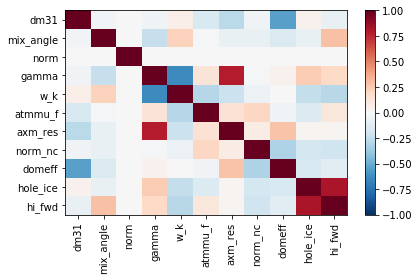

In [15]:
params = []
for param in result_NH["parameters"]:
    if not result_NH["fit_settings"][param][1]:
        params.append(param)
ticks = range(0,len(params))
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(result_NH["corr_matrix"]),cmap='RdBu_r', aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(params)
ax.set_yticklabels(params)
plt.xticks(rotation=90)
#x0, x1, y0, y1 = plt.axis()
#plt.axis((x0+3.0,x1+3.0, y0, y1))
fig.tight_layout()